In [27]:
import numpy as np
import matplotlib.pyplot as plt

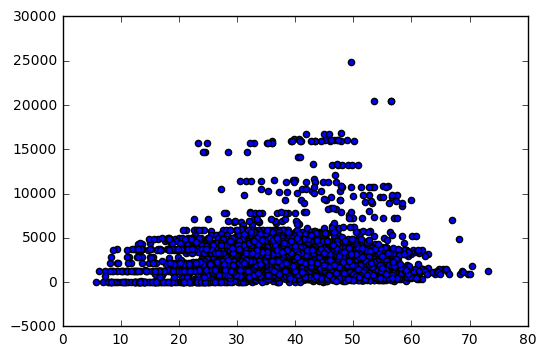

In [95]:
# Import the ISOMAP results
im_coors = np.load('.\\clustering_outputs\\isomap_coordinates_30_40_97.dat')
im_cluster_labels = np.load('.\\clustering_outputs\\isomap_clustering_labels_30_40_97.dat')

# Import the MSM builder results
msm_cluster_labels = np.load('.\\clustering_outputs\\msm_clustering_labels.dat')
msm_mfpt_mat = np.load('.\\clustering_outputs\\msm_mfpt_mat.dat')

num_frames = im_cluster_labels.shape[0]

# select frames to compare to each other
indices = range(num_frames)
np.random.shuffle(indices)
indices = indices[:100]

im_dist = []
mfpt = []
# Collect ISOMAP distances and MFTPS
for (idx1, frame1) in enumerate(indices):
    for (idx2, frame2) in enumerate(indices[(idx1+1):]):
        if msm_cluster_labels[frame1] < 95 and msm_cluster_labels[frame2] < 95:
            im_dist.append( np.linalg.norm(im_coors[frame1, :] - im_coors[frame2, :])  )
            mfpt.append( min( msm_mfpt_mat[msm_cluster_labels[frame2]][msm_cluster_labels[frame1]], 
                              msm_mfpt_mat[msm_cluster_labels[frame1]][msm_cluster_labels[frame2]]))
plt.scatter(np.array(im_dist), np.array(mfpt))
plt.show()

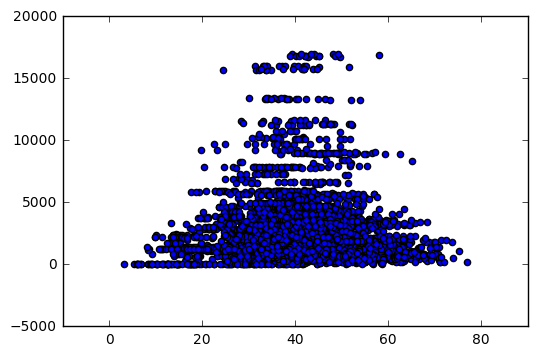

In [78]:
# Import the ISOMAP results
im_coors = np.load('.\\clustering_outputs\\isomap_coordinates_30_45_97.dat')
im_cluster_labels = np.load('.\\clustering_outputs\\isomap_clustering_labels_30_45_97.dat')

num_frames = im_cluster_labels.shape[0]

# select frames to compare to each other
indices = range(num_frames)
np.random.shuffle(indices)
indices = indices[:100]

im_dist = []
mfpt = []
# Collect ISOMAP distances and MFTPS
for (idx1, frame1) in enumerate(indices):
    for (idx2, frame2) in enumerate(indices[(idx1+1):]):
        if msm_cluster_labels[frame1] < 95 and msm_cluster_labels[frame2] < 95:
            im_dist.append( np.linalg.norm(im_coors[frame1, :] - im_coors[frame2, :])  )
            mfpt.append( min( msm_mfpt_mat[msm_cluster_labels[frame2]][msm_cluster_labels[frame1]], 
                              msm_mfpt_mat[msm_cluster_labels[frame1]][msm_cluster_labels[frame2]]))
plt.scatter(np.array(im_dist), np.array(mfpt))
plt.show()

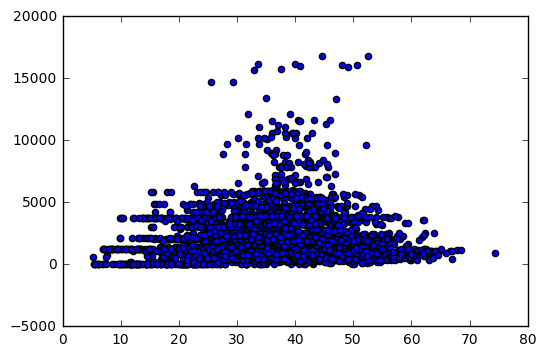

In [84]:
# Import the ISOMAP results
im_coors = np.load('.\\clustering_outputs\\isomap_coordinates_35_40_97.dat')
im_cluster_labels = np.load('.\\clustering_outputs\\isomap_clustering_labels_35_40_97.dat')

num_frames = im_cluster_labels.shape[0]

# select frames to compare to each other
indices = range(num_frames)
np.random.shuffle(indices)
indices = indices[:100]

im_dist = []
mfpt = []
# Collect ISOMAP distances and MFTPS
for (idx1, frame1) in enumerate(indices):
    for (idx2, frame2) in enumerate(indices[(idx1+1):]):
        if msm_cluster_labels[frame1] < 95 and msm_cluster_labels[frame2] < 95:
            im_dist.append( np.linalg.norm(im_coors[frame1, :] - im_coors[frame2, :])  )
            mfpt.append( min( msm_mfpt_mat[msm_cluster_labels[frame2]][msm_cluster_labels[frame1]], 
                              msm_mfpt_mat[msm_cluster_labels[frame1]][msm_cluster_labels[frame2]]))
plt.scatter(np.array(im_dist), np.array(mfpt))
plt.show()

In [47]:
msm_cluster_labels[indices

[64,
 1,
 8,
 83,
 73,
 27,
 78,
 79,
 60,
 45,
 39,
 0,
 21,
 4,
 67,
 70,
 61,
 16,
 26,
 58,
 50,
 56,
 57,
 29,
 17,
 9,
 63,
 40,
 71,
 91,
 6,
 13,
 93,
 31,
 22,
 77,
 3,
 59,
 32,
 12,
 35,
 49,
 76,
 23,
 80,
 86,
 25,
 55,
 43,
 33]